In [0]:
!pip install numpy==1.16.1

    100% |████████████████████████████████| 17.3MB 2.2MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:
!pip install pandas==0.24.1

    100% |████████████████████████████████| 10.1MB 4.6MB/s 
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


***Es necesario instalar las ultimas versiones de Numpy y pandas en orden de que funcione correctamente la lectura de los datos. Instalar primero Numpy. Reiniciar ambiente y luego instalar pandas.***

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
print(np.__version__)
print(pd.__version__)

1.16.1
0.24.1


# Lectura de los datos

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Lista los ficheros en la carpeta del drive
ls "/content/gdrive/My Drive/RN/datos/precios"

**Procesar los datos históricos para conformar el conjunto de datos. Los archivos de Excel no pueden ser modificados y actualizados directamente por el operador del sistema. **

**Su código debe leer los archivos y...**

In [0]:
dataframe = {}
for year in range(1995, 2016):
    dataframe[str(year)] = pd.read_excel(f'/content/gdrive/My Drive/RN/datos/precios/Precio_Bolsa_Nacional_($kwh)_{year}.xlsx')
    

for year in range(2016, 2019):
    dataframe[str(year)] = pd.read_excel(f'/content/gdrive/My Drive/RN/datos/precios/Precio_Bolsa_Nacional_($kwh)_{year}.xls')

dataframe.keys()

dict_keys(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

In [0]:
dataframe['1995'].head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Precio Bolsa Nacional ($/kWh) 1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fecha,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,...,14.000,15.000,16.000,17.000,18.000,19.000,20.000,21.000,22.000,23.000
3,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
4,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000


# Limpieza de los datos 
**(Duplicados, nombres de columnas, filas invalidas)**

In [0]:
def data_cleaning(dataframe, year):
    dtf = dataframe.copy()
    
    dtf.columns = [f'col{i}' for i in range(len(dtf.columns))]

    #Renombrando las columnas
    col = np.squeeze(dtf.loc[dtf[dtf.columns[0]] == 'Fecha'].values)
    ind = int(dtf.loc[dtf[dtf.columns[0]] == 'Fecha'].index.values) + 1
    dtf.columns = col
    # Eliminando filas inválidas
    dtf = dtf.drop(list(range(0, ind)))
    
    #Duplicados
    initial_shape = dtf.shape[0]
    dtf = dtf.drop_duplicates()
    #print(f'Dataframe {year}, Final shape: {dtf.shape}, Duplicados: {initial_shape - dtf.shape[0]}')

    return dtf


** ....y crear la serie de precios promedio diarios de la electricidad.**

In [0]:
def average(p_data):
    dtf = pd.DataFrame()
    dtf['Fecha'] = p_data['Fecha']
    dtf['mean'] = p_data.mean(axis=1)
    return dtf

In [0]:
for year in range(1995, 2019):
    year = str(year)
    dataframe[year] = data_cleaning(dataframe[year], year)
    dataframe[year] = average(dataframe[year])

**Concatenar los años para obtener un vector fila**

In [0]:
years = sorted(list(dataframe))
data_concatenated = pd.concat([dataframe[year] for year in years], axis=0)
#print(data_concatenated)


**¿Existen filas Nulas?**

In [0]:
print("¿Existen filas nulas?")
print(data_concatenated.isnull().any(axis=0))
#Eliminar filas nulas
data_concatenated = data_concatenated.dropna()
print("¿Existen filas nulas?")
print(data_concatenated.isnull().any(axis=0))

¿Existen filas nulas?
Fecha    True
mean     True
dtype: bool
¿Existen filas nulas?
Fecha    False
mean     False
dtype: bool


# ¿Transformación de los datos?

**Determinar si el modelo debe pronosticar los precios promedios sin ninguna transformación, o si la inclusión de una transformación (logaritmo natural, raíz cúbica, raíz cuadrada, etc) resulta en un incremento de la precisión del pronóstico.**

In [0]:
def plotting(X, ext=''):
    plt.figure(figsize=(20,3))
    plt.title('Precio Bolsa Nacional ($kwh)' + ext)
    plt.xlabel('Días')
    plt.ylabel('kWh')
    plt.plot(X, color='blue')
    plt.grid(color='black', linestyle='--', linewidth=0.5)
    plt.show();

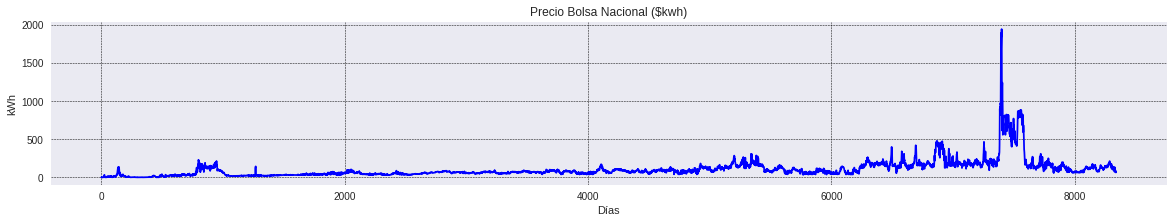

In [0]:
plotting(data_concatenated['mean'].values)

Es necesario aplicar alguna tranformación. Transformando los datos con **Raiz Cúbica** se manipulará los datos. (Con ln se presentaron problemas con el y_pred)

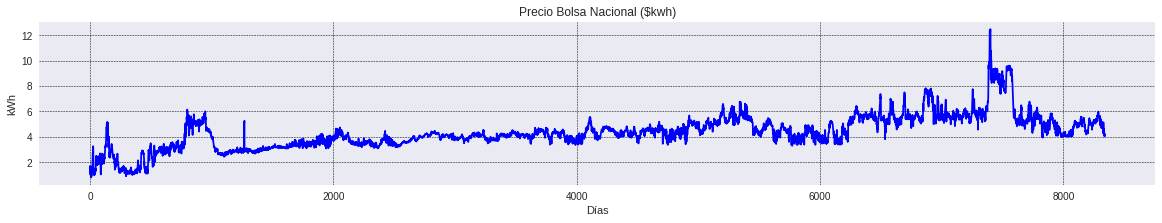

In [0]:
transformed_data = np.cbrt(data_concatenated['mean'].values.reshape(-1, 1))
plotting(transformed_data)

#ADALINE

### Precalentamiento de los pesos

In [0]:
#Intervalo de precalentamiento
precalentamiento = transformed_data[0:100]
precalentamiento = precalentamiento.reshape(-1)

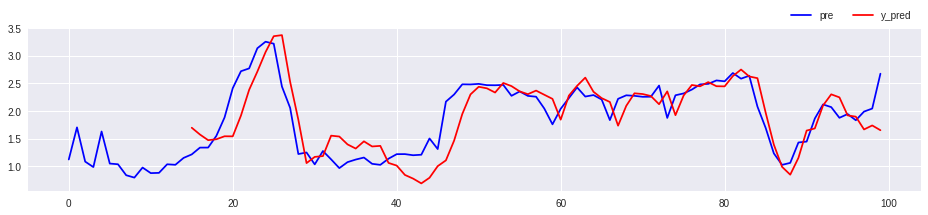

In [0]:

L = 15
mu = 0.006
w = np.array(0.1 * np.random.standard_normal(L+1))

y_pred = np.empty(len(precalentamiento))
y_pred[:] = np.nan

for i in range(4):
    for t in range(L, len(precalentamiento)):
        ## entrada al ADALINE
        x = np.concatenate([[1], precalentamiento[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = precalentamiento[t] - y_pred[t]
        w = w + 2 * mu * e * x

        
plt.figure(figsize=(16,3))
plt.plot(precalentamiento, color='blue', label="pre");
plt.plot(y_pred, color = 'red', label="y_pred");
plt.legend(bbox_to_anchor=(.85, 1.02, 1., 0.), loc=3, ncol=2,  borderaxespad=0.)


### Entrenamiento

In [0]:
def plotVS(y, pred):
  plt.figure(figsize=(20,3))
  plt.plot(d, color='black', label='training',linewidth=3)
  plt.plot(y_pred, color='red', linewidth=0.5, label='y_pred')
  plt.grid(color='white', linestyle='--', linewidth=0.5)
  plt.legend(bbox_to_anchor=(.85, 1.02, 1., 0.), loc=3, ncol=2,  borderaxespad=0.)
  plt.show();
    


In [0]:
#Intervalo de entrenamiento
training = transformed_data[100:]

In [0]:
d = training.reshape(-1)
y_pred = np.empty(len(d))
y_pred[:] = np.nan

mu = 0.0006

for i in range(4):
    for t in range(L, len(d)):
        ## entrada al ADALINE
        x = np.concatenate([[1], d[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = d[t] - y_pred[t]
        w = w + 2 * mu * e * x



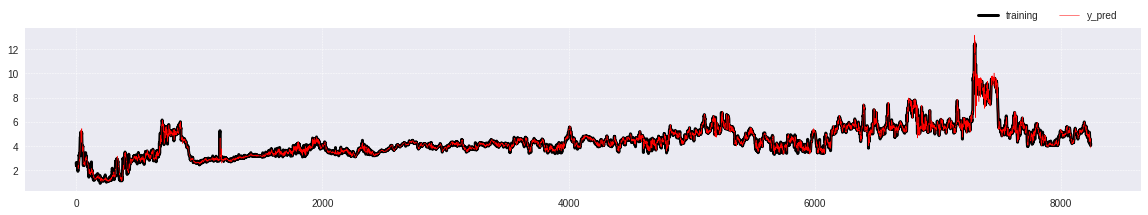

In [0]:
plotVS(d,y_pred)

## Generar el pronóstico para los precios de los próximos siete días.


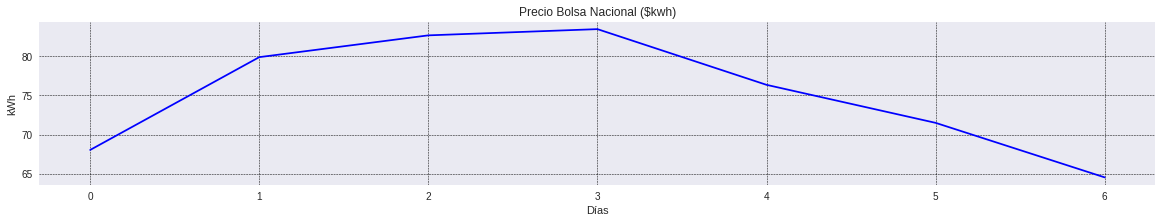

In [0]:
def prediction_model(d, w):  
    x = np.concatenate([[1], d])
    y_pred = np.dot(w, x)
    return y_pred

pred = list(d[len(d) - L:])
for i in range(7):
    pred.append(prediction_model(pred[i:], w))


pronos = np.power((np.array(pred).reshape(-1, 1)),3)
plotting(pronos[L:])

## Parámetros Óptimos
Determinar cuál es el número óptimo de retardos (observaciones) que el modelo debe considerar hacia atrás para producir el pronóstico.
Preparar el código para que el modelo sea entrenado usando el gradiente y el momentum.

### Búsqueda de parámetros óptimos con SSE

In [0]:
def sse_score_model(L, mu, pre, training):       
    y_pred = np.empty(len(pre))
    y_pred[:] = np.nan
    
    w = np.array(0.1 * np.random.standard_normal(L+1))
    for i in range(4):
        for t in range(L, len(pre)):
            ## entrada al ADALINE
            x = np.concatenate([[1], pre[t-L:t]])
            ## algoritmo de aprendizaje
            y_pred[t] = np.dot(w, x)
            e = pre[t] - y_pred[t]
            w = w + 2 * mu * e * x
                   
    SSE = []
    d = training.reshape(-1)
    
    y_pred = np.empty(len(d))
    y_pred[:] = np.nan
    
    for i in range(4):
        _sse = 0
        for t in range(L, len(d)):
            ## entrada al ADALINE
            x = np.concatenate([[1], d[t-L:t]])
            y_pred[t] = np.dot(w, x)

            ## algoritmo de aprendizaje
            e = d[t] - y_pred[t]
            
            _sse += e ** 2
            w = w + 2 * mu * e * x

        SSE.append(_sse)
        
    return SSE[-1]
  
def search(learning_rate, L, precalentamiento, training):
    score_mse = []    
    for mu in learning_rate:
        for l in L:
            result = sse_score_model(l, mu, precalentamiento, training)            
            params = {'mu': mu, 'L': l}
            score_mse.append((result, params))            
            print(f"{result:<10.2f} para {params}")

    return score_mse

In [0]:
result = np.array(search(learning_rate=[0.0003,0.00035,0.00038,0.0004,0.00045],L=[12, 13, 14, 15],precalentamiento=precalentamiento,training=training))

i_min = np.argmin(result[:,0])
print(f'\nParámetros óptimos: {result[i_min, 1]}')
print(result[i_min])

345.58     para {'mu': 0.0003, 'L': 12}
364.32     para {'mu': 0.0003, 'L': 13}
366.73     para {'mu': 0.0003, 'L': 14}
347.95     para {'mu': 0.0003, 'L': 15}
355.62     para {'mu': 0.00035, 'L': 12}
348.84     para {'mu': 0.00035, 'L': 13}
343.37     para {'mu': 0.00035, 'L': 14}
357.97     para {'mu': 0.00035, 'L': 15}
358.29     para {'mu': 0.00038, 'L': 12}
360.53     para {'mu': 0.00038, 'L': 13}
362.38     para {'mu': 0.00038, 'L': 14}
365.80     para {'mu': 0.00038, 'L': 15}
349.83     para {'mu': 0.0004, 'L': 12}
362.26     para {'mu': 0.0004, 'L': 13}
355.27     para {'mu': 0.0004, 'L': 14}
365.06     para {'mu': 0.0004, 'L': 15}
357.49     para {'mu': 0.00045, 'L': 12}
353.49     para {'mu': 0.00045, 'L': 13}
353.98     para {'mu': 0.00045, 'L': 14}
344.87     para {'mu': 0.00045, 'L': 15}

Parámetros óptimos: {'mu': 0.00035, 'L': 14}
[343.3731853798106 {'mu': 0.00035, 'L': 14}]


### ADALINE con valores óptimos

In [0]:
L = 14
mu = 0.00035

w = np.array(0.1 * np.random.standard_normal(L+1))

y_pred = np.empty(len(precalentamiento))
y_pred[:] = np.nan

for i in range(4):
    for t in range(L, len(precalentamiento)):
        ## entrada al ADALINE
        x = np.concatenate([[1], precalentamiento[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = precalentamiento[t] - y_pred[t]
        w = w + 2 * mu * e * x
        
d = training.reshape(-1)
y_pred = np.empty(len(d))
y_pred[:] = np.nan

for i in range(4):
    _sse = 0
    for t in range(L, len(d)):
        ## entrada al ADALINE
        x = np.concatenate([[1], d[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = d[t] - y_pred[t]
        w = w + 2 * mu * e * x

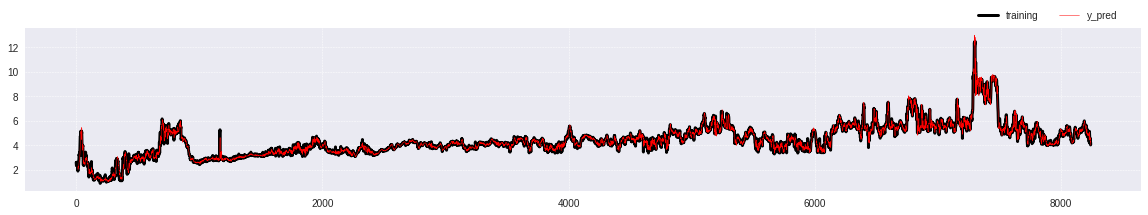

In [0]:
plotVS(d,y_pred)

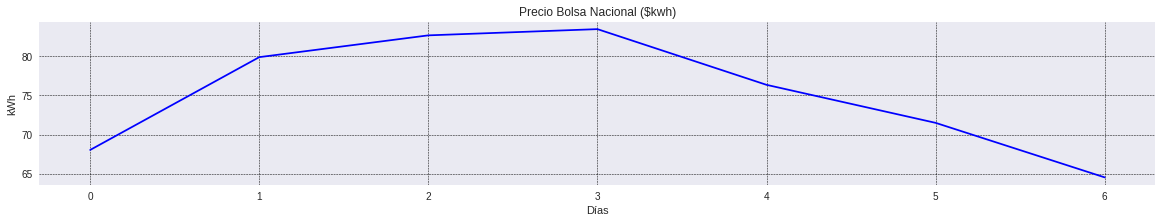

In [0]:
pronos = np.power((np.array(pred).reshape(-1, 1)),3)
plotting(pronos[L:])